In [22]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [23]:
train_data = pd.read_csv('train.csv', header=None)
train_target = pd.read_csv('trainLabels.csv', header=None)
test_data = pd.read_csv('test.csv', header=None)

In [24]:
feature_set = train_data.append(test_data, ignore_index = True)
feature_set.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
1523,-0.155549,-0.786783,-0.182168,0.928171,4.090237,0.242266,-0.551016,0.117287,-0.522129,0.272245,...,-0.146089,1.027439,0.096145,1.225380,-0.916341,-0.581390,0.444949,-0.146211,-1.829881,0.772587
769,1.288941,-0.853400,1.095039,0.364139,4.364403,-0.189422,-2.569686,-1.826182,0.993502,-1.396518,...,1.769493,-0.307055,-2.505570,-0.651753,1.872727,-0.238793,1.113603,-0.320825,-0.659966,-0.518861
6498,-0.876430,-0.993123,2.443915,0.585574,1.099476,-1.625915,-2.388544,-3.281754,-0.472187,0.659911,...,1.648129,0.205579,-4.342644,0.690061,-4.153440,-0.432244,2.535401,0.540773,0.891582,3.250207
7905,-0.535671,0.363412,0.305893,0.180247,-2.766177,-0.861492,0.839366,-0.387147,1.173016,0.356225,...,1.171839,1.081212,3.070393,-0.100313,-3.990281,-1.855064,-2.752206,-1.440904,-3.118397,1.615333
8104,-1.177986,-0.499443,-1.575433,2.231689,-2.298703,0.607416,1.564450,-0.206556,0.071545,-1.123984,...,0.248056,-0.097995,-0.659126,0.757184,0.908650,-1.538828,0.739797,0.280923,-1.013622,1.817306


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CD5A2F31D0>]],
      dtype=object)

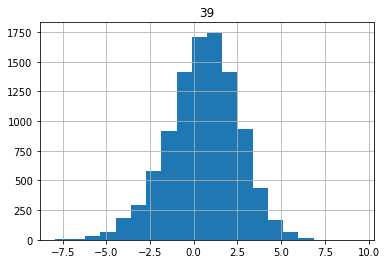

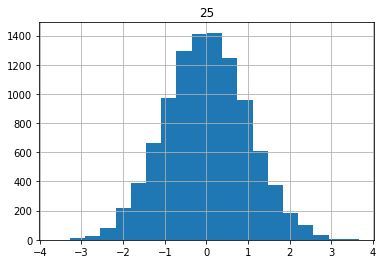

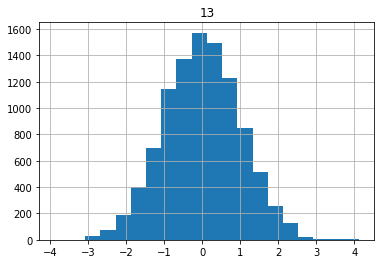

In [25]:
feature_set.hist(39, bins=20)
feature_set.hist(25, bins=20)
feature_set.hist(13, bins=20)

In [67]:
x_train, x_test, y_train, y_test = train_test_split(train_data, train_target, test_size=0.2, shuffle=True)

normalizer = StandardScaler()

normalizer.fit(feature_set)

x_train_n, x_test_n = normalizer.transform(x_train), normalizer.transform(x_test)

test_set =  normalizer.transform(test_data)

In [46]:
RFCF = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=2, min_samples_split=2, random_state=42)

RFCF.fit(x_train_n, y_train)

y_pred = RFCF.predict(x_test_n)

acc = metrics.accuracy_score(y_pred, y_test)

print("Accuracy Score : %.5f"%acc)

D:\Anaconda3\envs\DNNGPU\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy Score : 0.91500


In [66]:
GBCF = GradientBoostingClassifier(n_estimators=500, max_depth=10, min_samples_leaf=3, min_samples_split=2, random_state=42, learning_rate=0.02)

GBCF.fit(x_train_n, y_train)

y_pred = GBCF.predict(x_test_n)

acc = metrics.accuracy_score(y_pred, y_test)

print("Accuracy Score : %.5f"%acc)

D:\Anaconda3\envs\DNNGPU\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score : 0.90000


In [76]:
y_pred_test = GBCF.predict(test_set)
Id = [id for id in range(1,y_pred_test.shape[0]+1)]
y_pred_test_df = pd.DataFrame({'Id':Id,'Solution':y_pred_test})
y_pred_test_df.to_csv('Prediction_GB.csv',index=0)